In [2]:
suppressWarnings(library(tidyverse))
suppressWarnings(library(testthat))
suppressWarnings(library(digest))
suppressWarnings(library(repr))
suppressWarnings(library(caret))

In [14]:
suppressWarnings(install.packages("GGally"))
suppressWarnings(library(GGally))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
1

[1] 1

In [23]:
white_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                    delim=";", skip=1,
                    col_names=c("fixed_acidity","volatile_acidity","citric_acid",
                                "residual_sugar","chlorides","free_SO2","total_SO2",
                                "density","pH","sulphates","alcohol","quality"))
red_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                    delim=";", skip=1,
                    col_names=c("fixed_acidity","volatile_acidity","citric_acid",
                                "residual_sugar","chlorides","free_SO2","total_SO2",
                                "density","pH","sulphates","alcohol","quality"))

Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_SO2 = col_double(),
  total_SO2 = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_SO2 = col_double(),
  total_SO2 = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col       expected               actual file                            expected   <int> <chr>     <chr>                  <chr>  <chr>                           ac

In [24]:
head(red_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [25]:
head(white_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [26]:
nrow(white_wine)
nrow(red_wine)

[1] 4898

[1] 1599

In [90]:
wine <- bind_rows(list(white = white_wine , red = red_wine), .id = "type")

In [84]:
options(repr.plot.width=5.5,repr.plot.height=4.5)
quality_dist <- ggplot(wine, aes(x = quality)) +
  geom_bar(stat='identity') 
  xlab("Quality") +
  ylab("Count")

ERROR: Error in xlab("Quality") + ylab("Count"): non-numeric argument to binary operator


In [91]:
tail(wine)

type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
red,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
red,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
red,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
red,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
red,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
red,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [124]:
distt <- ggplot(wine,aes(x=quality)) +
    geom_bar(stat="count") +
    geom_text(aes(label="x"),stat="count",position=position_stack())


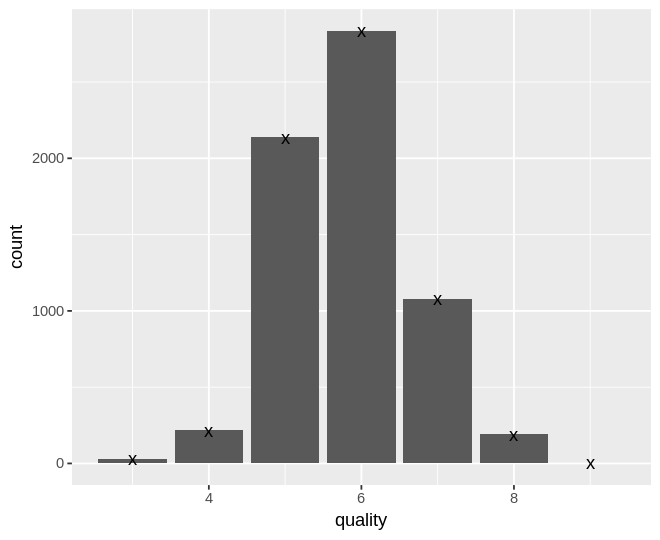

In [125]:
distt

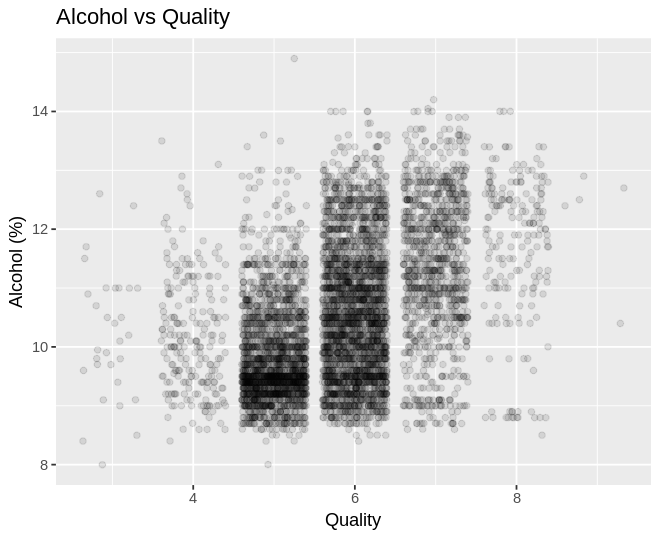

In [51]:
options(repr.plot.width=5.5,repr.plot.height=4.5)

alcohol_plot <- ggplot(wine, aes(x = quality, y = alcohol)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Quality") + 
    ylab("Alcohol (%)") +
    ggtitle("Alcohol vs Quality")
alcohol_plot

In [52]:
options(repr.plot.width=5.5,repr.plot.height=4.5)
wine <- wine %>% 
  select(fixed_acidity:alcohol, quality)
glimpse(wine)

lots <- ggpairs(wine, mapping = ggplot2::aes(alpha=1/10))

Observations: 6,497
Variables: 12
$ fixed_acidity    <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8.1, ...
$ volatile_acidity <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27, 0....
$ citric_acid      <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36, 0....
$ residual_sugar   <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20.70, ...
$ chlorides        <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.045, 0...
$ free_SO2         <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17, 16...
$ total_SO2        <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129, 63...
$ density          <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951, 0....
$ pH               <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00, 3....
$ sulphates        <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45, 0....
$ alcohol          <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5, 11....
$ quality          <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6,...


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning

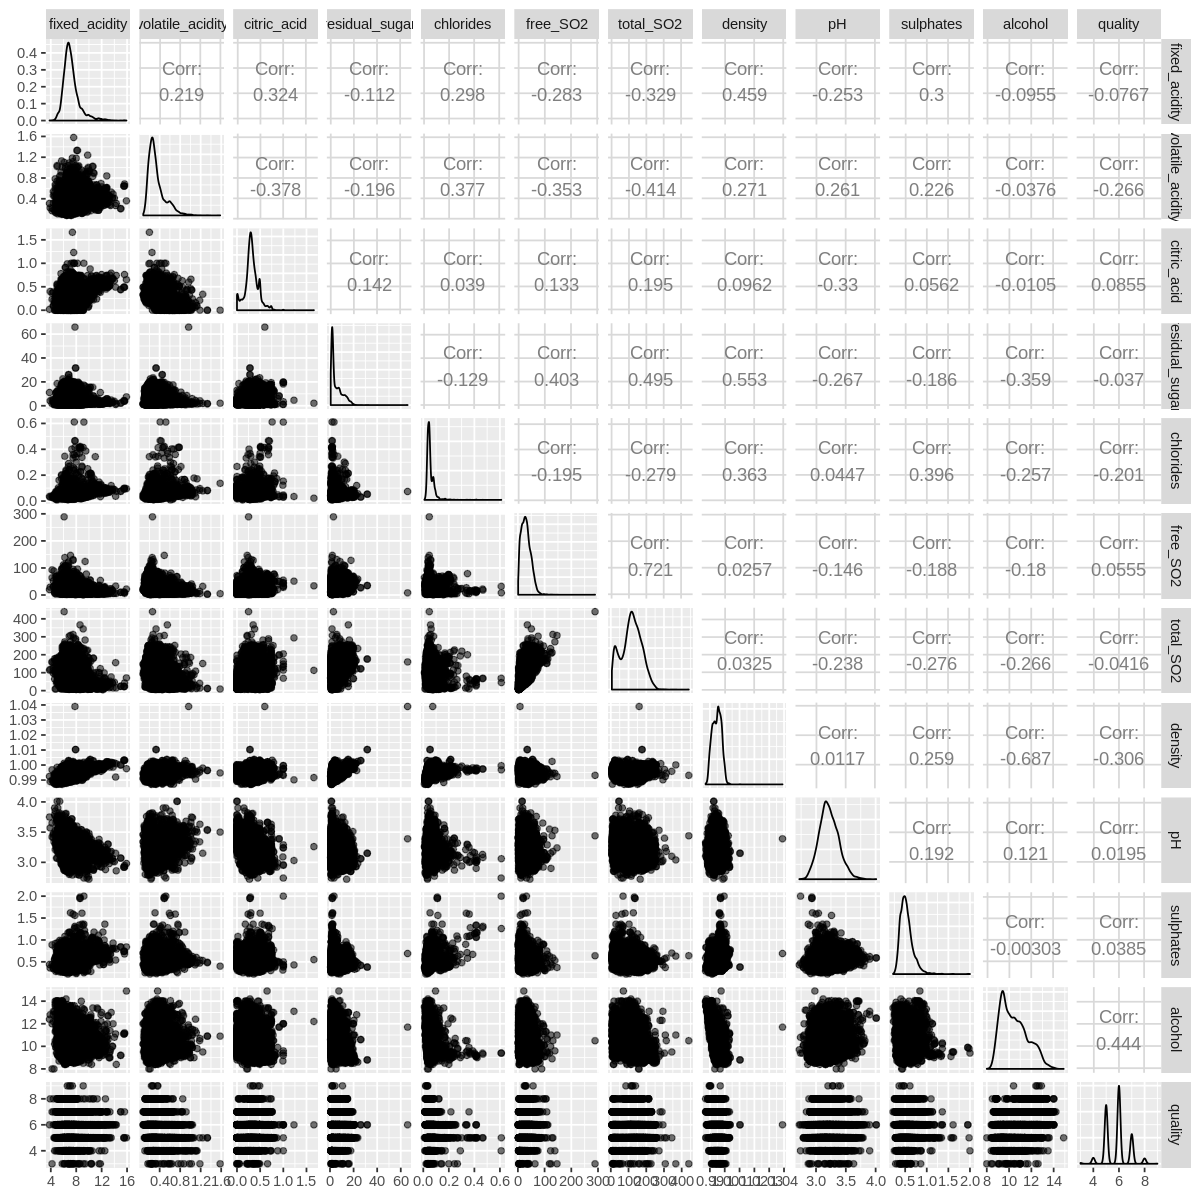

In [53]:
options(repr.plot.width=10,repr.plot.height=10)
lots

In [54]:
german<-hdhdh